# Steuerungsentwurf

In [3]:
import sys
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from IPython.display import display, Image
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp

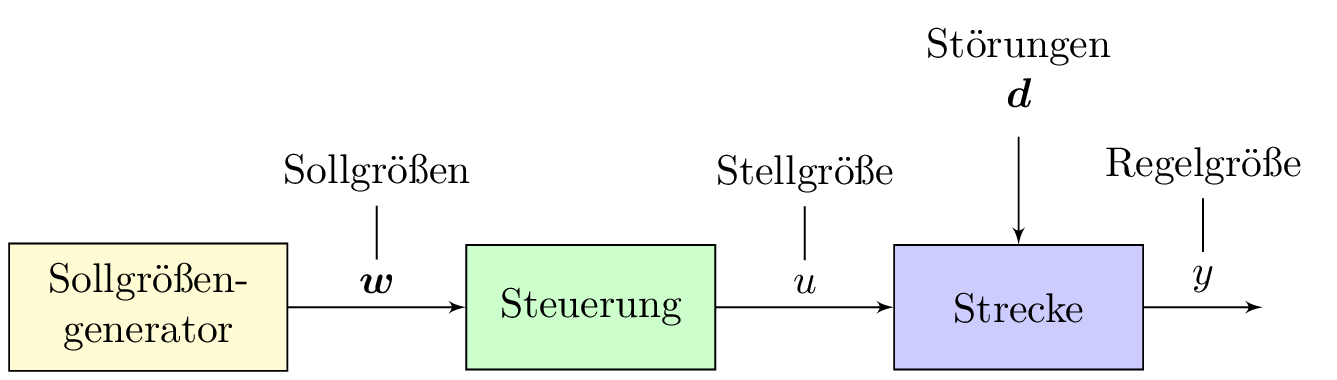

In [4]:
imag = Image("../images/feedforward.png", width=600)
display(imag)

Ziel ist der Entwurf einer Steuerung für das linearisierte Modell
\begin{align*}
    T_1 T_2 \ddot{\tilde{z}}_2(t) + (T_1 + T_2)\dot{\tilde{z}}_2(t) + \tilde{z}_2(t) & = \tilde{u}_{\mathrm{A}}(t)
\end{align*}
des Zweitanksystems um die Füllstandshöhe des zweiten Tanks von einem auf ein zweites Niveau in einer vorgegebenen Zeit zu überführen.
mittels einer $n$-mal stetig differenzierbaren Trajektroie
\begin{align*}
    z_{2,\mathrm{r}}(t) & = \begin{cases}
         z_{2,a} & t < t_a \\
         z_{2,a} & t < t_a \\
         z_{2,a} & t < t_a \\
    \end{cases}
\end{align*}

## Systemparameter

In [5]:
KPhy = 0.147763421835044
T1Phy = 34.567259359529
T2Phy = 68.2115206317666
bz2Phy = 0.137092448385557
buAPhy = 9
KMessung = 0.147763421835044
T1Messung = 34.567259359529
T2Messung = 68.2115206317666
bz2Messung = 0.137092448385557
buAMessung = 9

## Bestimmung der Koeffizienten

## Vergleich der Steuerung an den Modellen

In [ ]:
measData = pd.read_csv('../../../Messungen/2Tanksystem/20221122_Sprungantwort_9V_Aufbau1_V12_2_0vU_V21_2_1vU.csv')

In [ ]:
params = {
    'T1': [round(T1_analytic, 5), round(T1_pt2, 5), round(T1_pt1, 5)],
    'T2': [round(T2_analytic, 5), round(T2_pt2, 5), round(T2_pt1, 5)],
    'Kp': [round(Kp_analytic, 5), round(Kp_pt2, 5), round(Kp_pt1, 5)],
}
print ("{:<5} {:<11} {:<9} {:<11}".format(' ','analytisch','PT2','PT1'))
for name, values in params.items():
    s1, s2, s3 = values
    print ("{:<5} {:<11} {:<9} {:<11}".format(name, s1, s2, s3))

In [ ]:
def linSys(t, x, u, A, B):
    return A.dot(x) +  B.dot(u)

In [ ]:
A_analytic = np.array([[0, 1],
                       [-1 / (T1_analytic * T2_analytic), - (T1_analytic + T2_analytic) / (T1_analytic * T2_analytic)]])
B_analytic = np.array([[0],
                       [Kp_analytic / (T1_analytic * T2_analytic)]])

A_pt2 = np.array([[0, 1],
                  [-1 / (T1_pt2 * T2_pt2), - (T1_pt2 + T2_pt2) / (T1_pt2 * T2_pt2)]])
B_pt2 = np.array([[0],
                  [Kp_pt2 / (T1_pt2 * T2_pt2)]])

A_pt1 = np.array([[0, 1],
                  [-1 / (T1_pt1 * T2_pt1), - (T1_pt1 + T2_pt1) / (T1_pt1 * T2_pt1)]])
B_pt1 = np.array([[0],
                  [Kp_pt1 / (T1_pt1 * T2_pt1)]])

In [ ]:
tDom = np.linspace(0, len(measData['HeightT2']), len(measData['HeightT2'])) / 10
x0 = [0, 0]
u = [1]

sol_analytic = solve_ivp(linSys, [tDom[0], tDom[-1]], x0, t_eval=tDom, args=(u, A_analytic, B_analytic))
sol_pt2 = solve_ivp(linSys, [tDom[0], tDom[-1]], x0, t_eval=tDom, args=(u, A_pt2, B_pt2))
sol_pt1 = solve_ivp(linSys, [tDom[0], tDom[-1]], x0, t_eval=tDom, args=(u, A_pt1, B_pt1))

In [ ]:
plt.close()

fig1, axes10 = plt.subplots(1, 1, sharex=True, figsize=(9,7))

axes10.plot(tDom, measData['HeightT2'], label='meas analytisch')
axes10.plot(tDom, sol_analytic.y[0], label='analytisch')
axes10.plot(tDom, sol_pt2.y[0], label='PT2')
axes10.plot(tDom, sol_pt1.y[0], label='PT1')

axes10.set_ylabel('T1 Height [m]')
axes10.set_xlabel('time [s]')

handlesAx1, labelsAx1 = axes10.get_legend_handles_labels()
axes10.legend([handle for i, handle in enumerate(handlesAx1)],
              [label for i, label in enumerate(labelsAx1)],
              bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=9, mode="expand", borderaxespad=0., framealpha=0.5)

axes10.grid()
plt.show()